In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np

In [2]:
data1 = pd.read_csv('C:/Users/Jeffery/Google Drive/Homework/project/cleaned independent factors.csv')
data2 = pd.read_excel('C:/Users/Jeffery/Google Drive/Homework/project/Construction Projects.xlsx')
data3 = pd.read_excel('C:/Users/Jeffery/Google Drive/Homework/project/final data.xlsx')

In [3]:
data1.head(2)

,year,month str,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature,month
0,2014,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9,1
1,2014,February,6.7,155485,145102,10383,6010,12.8,103.6292,947088,235.672,35.3,2


In [4]:
data2.head(2)

,Date,Public,Private,Total,month,year
0,2014-01-01,260580,694062,954642,1,2014
1,2014-02-01,260887,686201,947088,2,2014


In [5]:
data3.head(2)

,BILL_RUN_DATE,year,month_nm,Division,sales,dayofweek,week,month
0,2014-01-03,2014,Jan,C,2527858.254,4,1,1
1,2014-01-03,2014,Jan,S,84509.652,4,1,1


In [6]:
data3 = data3.loc[data3['year'].isin([2014, 2015,2016])]

In [7]:
data = data3
data = pd.merge(data, data2, on = ['month','year'], how = 'left')
data = pd.merge(data, data1, on = ['month','year'], how = 'left')

In [8]:
data.shape

(17088, 23)

In [9]:
data.head(5)

,BILL_RUN_DATE,year,month_nm,Division,sales,dayofweek,week,month,Date,Public,...,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014-01-03,2014,Jan,C,2527858.254,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
1,2014-01-03,2014,Jan,S,84509.652,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
2,2014-01-03,2014,Jan,G,1027.920,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
3,2014-01-03,2014,Jan,F,2113.662,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
4,2014-01-03,2014,Jan,K,341143.206,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9


In [10]:
data.columns

Index(['BILL_RUN_DATE', 'year', 'month_nm', 'Division', 'sales', 'dayofweek',
       'week', 'month', 'Date', 'Public', 'Private', 'Total', 'month str',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature'],
      dtype='object')

In [11]:
month = data.groupby(['year', 'month'], as_index=False)['sales'].sum()

month = pd.merge(month, data2, on = ['month','year'], how = 'left')
month = pd.merge(month, data1, on = ['month','year'], how = 'left')
del month['Date']
del month['month str']
month.head(10)

,year,month,sales,Public,Private,Total,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014,1,7.132159e+07,260580,694062,954642,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
1,2014,2,7.045462e+07,260887,686201,947088,6.7,155485,145102,10383,6010,12.8,103.6292,947088,235.672,35.3
2,2014,3,7.934422e+07,264972,682331,947303,6.7,156115,145715,10400,6047,11.3,104.5546,947303,235.978,42.4
3,2014,4,7.823823e+07,270530,684588,955118,6.2,155378,145673,9705,6086,9.4,104.7807,955118,236.471,52.0
4,2014,5,7.699178e+07,273317,682820,956137,6.3,155559,145819,9740,6112,8.6,105.0799,956137,236.832,60.8
5,2014,6,8.014754e+07,272854,684266,957120,6.1,155682,146222,9460,6132,8.2,105.4698,957120,237.029,68.7
6,2014,7,7.759557e+07,277224,682819,960043,6.2,156098,146461,9637,6174,7.5,105.4919,960043,237.424,73.3
7,2014,8,7.796993e+07,276685,684382,961067,6.2,156117,146501,9616,6204,7.7,105.4250,961067,237.256,72.1
8,2014,9,7.939032e+07,272291,688027,960318,5.9,156100,146845,9255,6231,7.0,105.7329,960318,237.486,65.2
9,2014,10,9.052564e+07,278593,692396,970989,5.7,156389,147426,8964,6251,6.4,105.7898,970989,237.506,54.8


In [12]:
week = data.groupby(['year','week','month'],as_index=False)['sales'].sum()
week = pd.merge(week, data2, on = ['month','year'], how = 'left')
week = pd.merge(week, data1, on = ['month','year'], how = 'left')
#week = data.groupby(['year','week'],as_index=False)['sales'].sum()
#del week['Date']
#del week['month str']

In [13]:
week.columns

Index(['year', 'week', 'month', 'sales', 'Date', 'Public', 'Private', 'Total',
       'month str', 'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature'],
      dtype='object')

In [14]:
#data.to_excel('C:/Users/Jeffery/Google Drive/Homework/IOWA/Jeffery/data.xlsx')
#month.to_excel('C:/Users/Jeffery/Google Drive/Homework/IOWA/Jeffery/month.xlsx')
#week.to_excel('C:/Users/Jeffery/Google Drive/Homework/IOWA/Jeffery/week.xlsx')

visual

In [15]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


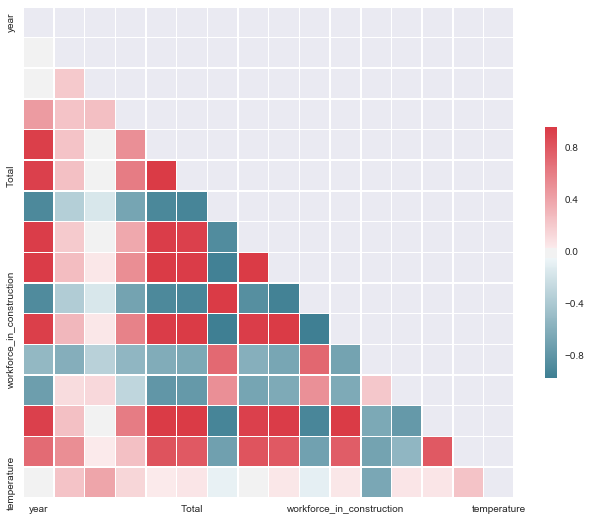

In [16]:
#figure for month
corr = month.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [17]:
corr

,year,month,sales,Public,Private,Total,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
year,1.000000,0.000000,-0.014078,0.460931,0.942143,0.932175,-0.886104,0.951151,0.956757,-0.872924,0.942793,-0.521923,-0.722135,0.932175,0.710571,0.000000
month,0.000000,1.000000,0.212375,0.242997,0.246944,0.261093,-0.346877,0.205509,0.273143,-0.356650,0.303605,-0.596794,0.119543,0.261093,0.527832,0.243640
sales,-0.014078,0.212375,1.000000,0.267600,-0.005771,0.031388,-0.152046,-0.008295,0.055367,-0.153523,0.053738,-0.324354,0.130476,0.031388,0.042090,0.404310
Public,0.460931,0.242997,0.267600,1.000000,0.515845,0.612950,-0.667838,0.390572,0.522293,-0.685988,0.586441,-0.529920,-0.281172,0.612950,0.261198,0.147160
Private,0.942143,0.246944,-0.005771,0.515845,1.000000,0.993070,-0.897896,0.952121,0.963071,-0.887340,0.960277,-0.614810,-0.780791,0.993070,0.832542,0.044039
Total,0.932175,0.261093,0.031388,0.612950,0.993070,1.000000,-0.919750,0.931725,0.959895,-0.912504,0.966118,-0.639739,-0.758699,1.000000,0.803690,0.060806
overall_unemployment_rate,-0.886104,-0.346877,-0.152046,-0.667838,-0.897896,-0.919750,1.000000,-0.863574,-0.950035,0.998448,-0.968354,0.721500,0.521511,-0.919750,-0.711030,-0.071778
labor_force,0.951151,0.205509,-0.008295,0.390572,0.952121,0.931725,-0.863574,1.000000,0.977555,-0.846012,0.952627,-0.583940,-0.668294,0.931725,0.827825,0.029131
employment,0.956757,0.273143,0.055367,0.522293,0.963071,0.959895,-0.950035,0.977555,1.000000,-0.939351,0.992623,-0.664830,-0.630870,0.959895,0.808375,0.053351
unemployment,-0.872924,-0.356650,-0.153523,-0.685988,-0.887340,-0.912504,0.998448,-0.846012,-0.939351,1.000000,-0.961272,0.731953,0.508755,-0.912504,-0.698193,-0.087746


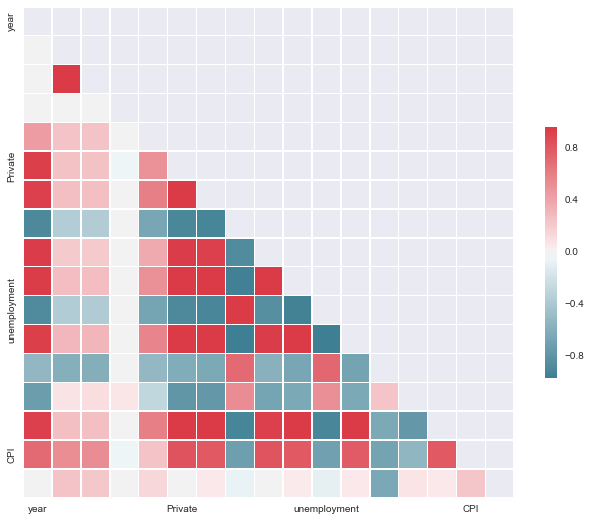

In [18]:
#figure for month
corr = week.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [19]:
corr

,year,week,month,sales,Public,Private,Total,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
year,1.000000,0.018335,0.011105,-0.025487,0.451074,0.944056,0.934051,-0.886494,0.952382,0.958164,-0.873221,0.943727,-0.527730,-0.728703,0.934051,0.714266,-0.003053
week,0.018335,1.000000,0.963952,0.018863,0.245725,0.254884,0.269128,-0.348590,0.206397,0.273471,-0.356472,0.306469,-0.585102,0.081299,0.269128,0.527370,0.246686
month,0.011105,0.963952,1.000000,-0.004655,0.243598,0.254571,0.268547,-0.355840,0.209517,0.278930,-0.365212,0.311116,-0.590310,0.107030,0.268547,0.529914,0.225934
sales,-0.025487,0.018863,-0.004655,1.000000,0.016478,-0.041982,-0.036542,0.001564,-0.035212,-0.023567,0.002158,-0.023764,0.009745,0.066981,-0.036542,-0.040313,0.009692
Public,0.451074,0.245725,0.243598,0.016478,1.000000,0.504158,0.602598,-0.660206,0.377396,0.510683,-0.678937,0.576365,-0.518982,-0.279005,0.602598,0.245650,0.137858
Private,0.944056,0.254884,0.254571,-0.041982,0.504158,1.000000,0.993005,-0.900297,0.952473,0.964651,-0.889574,0.961977,-0.615108,-0.785831,0.993005,0.831945,0.033837
Total,0.934051,0.269128,0.268547,-0.036542,0.602598,0.993005,1.000000,-0.922206,0.931756,0.961232,-0.914858,0.967741,-0.639361,-0.764314,1.000000,0.802367,0.050115
overall_unemployment_rate,-0.886494,-0.348590,-0.355840,0.001564,-0.660206,-0.900297,-0.922206,1.000000,-0.862218,-0.949257,0.998405,-0.967906,0.722259,0.533907,-0.922206,-0.711763,-0.063233
labor_force,0.952382,0.206397,0.209517,-0.035212,0.377396,0.952473,0.931756,-0.862218,1.000000,0.977510,-0.844274,0.952203,-0.582148,-0.676298,0.931756,0.827945,0.020080
employment,0.958164,0.273471,0.278930,-0.023567,0.510683,0.964651,0.961232,-0.949257,0.977510,1.000000,-0.938305,0.992463,-0.663916,-0.641426,0.961232,0.809087,0.044072


analysis

In [20]:
from sklearn import datasets, linear_model

In [21]:
week.columns

Index(['year', 'week', 'month', 'sales', 'Date', 'Public', 'Private', 'Total',
       'month str', 'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature'],
      dtype='object')

In [22]:
week = week.sort(['year', 'month', 'week'])
week.head(5)

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,year,week,month,sales,Date,Public,Private,Total,month str,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014,1,1,4.912439e+06,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
2,2014,2,1,1.450659e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
3,2014,3,1,1.740329e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
4,2014,4,1,1.610537e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
5,2014,5,1,1.839390e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9


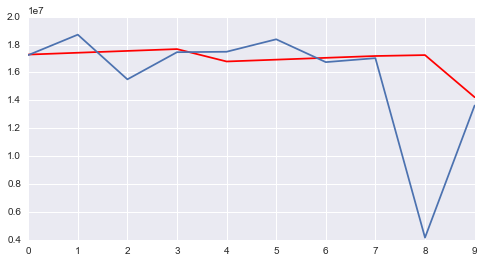

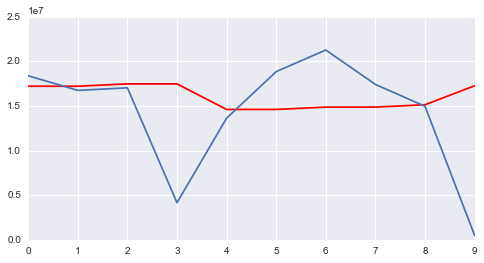

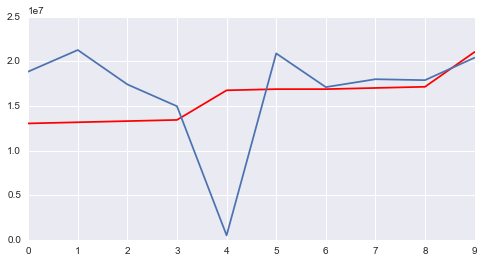

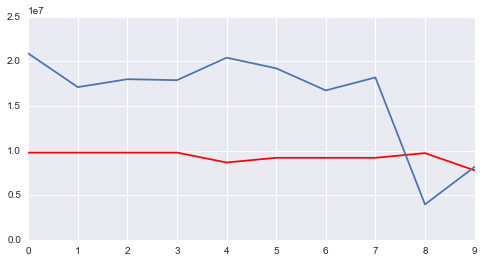

In [40]:
x = week[['year', 'week', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = week['sales']
def machinelearning(x,y,i):
    xtrain = x[:i]
    ytrain = y[:i]
    xtest = x[i:i+10]
    ytest = y[i:i+10]
    #print(xtrain.shape, ytrain.shape)
    #print(ytest)
    reg = linear_model.LinearRegression()
    reg.fit(xtrain,ytrain)
    # The coefficients
    # print('Coefficients:', reg.coef_)
    # The mean squared error
    #print("Mean squared error: %.2f"
    #      % np.mean((reg.predict(xtest) - ytest) ** 2))
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % reg.score(xtest, ytest))
    a = list(reg.predict(xtest))
    b = list(ytest)
    plt.figure(figsize=(8,4), dpi = 400)
    plt.plot(a,color='r')
    plt.plot(b)
    plt.show()

for i in range(117,133,5):
    machinelearning(x,y,i)    

In [24]:
week = week.sort(['year', 'month', 'week'])
week.head(5)

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,year,week,month,sales,Date,Public,Private,Total,month str,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014,1,1,4.912439e+06,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
2,2014,2,1,1.450659e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
3,2014,3,1,1.740329e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
4,2014,4,1,1.610537e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
5,2014,5,1,1.839390e+07,2014-01-01,260580,694062,954642,January,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9


(124, 15) (124,)
Coefficients: [  2.77368958e+07   2.17357086e+06   4.53004104e+01  -5.98778772e+01
  -1.45773449e+01  -7.90092453e+06   9.91598968e+05  -9.90504924e+05
  -9.86458944e+05  -7.88780297e+04   5.85504028e+04  -4.43899390e+05
  -1.45773287e+01   1.91811568e+06  -6.56927001e+04]
Mean squared error: 175096204656299.84
Variance score: -4.78


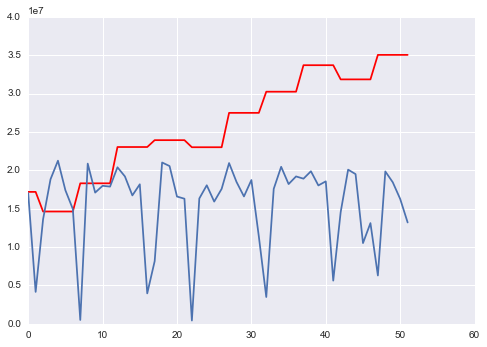

In [25]:

x = week[['year', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = week['sales']
xtrain = x[:-52]
ytrain = y[:-52]
xtest = x[-52:]
ytest = y[-52:]
print( xtrain.shape, ytrain.shape)
reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
# The coefficients
print('Coefficients:', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(xtest) - ytest) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(xtest, ytest))
a = list(reg.predict(xtest))
b = list(ytest)
plt.plot(a,color='r')
plt.plot(b)
plt.show()

In [26]:
month.columns

Index(['year', 'month', 'sales', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature'],
      dtype='object')

In [27]:
month.shape

(36, 16)

In [28]:
month = month.sort(['year', 'month'])
month

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,year,month,sales,Public,Private,Total,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014,1,7.132159e+07,260580,694062,954642,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
1,2014,2,7.045462e+07,260887,686201,947088,6.7,155485,145102,10383,6010,12.8,103.6292,947088,235.672,35.3
2,2014,3,7.934422e+07,264972,682331,947303,6.7,156115,145715,10400,6047,11.3,104.5546,947303,235.978,42.4
3,2014,4,7.823823e+07,270530,684588,955118,6.2,155378,145673,9705,6086,9.4,104.7807,955118,236.471,52.0
4,2014,5,7.699178e+07,273317,682820,956137,6.3,155559,145819,9740,6112,8.6,105.0799,956137,236.832,60.8
5,2014,6,8.014754e+07,272854,684266,957120,6.1,155682,146222,9460,6132,8.2,105.4698,957120,237.029,68.7
6,2014,7,7.759557e+07,277224,682819,960043,6.2,156098,146461,9637,6174,7.5,105.4919,960043,237.424,73.3
7,2014,8,7.796993e+07,276685,684382,961067,6.2,156117,146501,9616,6204,7.7,105.4250,961067,237.256,72.1
8,2014,9,7.939032e+07,272291,688027,960318,5.9,156100,146845,9255,6231,7.0,105.7329,960318,237.486,65.2
9,2014,10,9.052564e+07,278593,692396,970989,5.7,156389,147426,8964,6251,6.4,105.7898,970989,237.506,54.8


Variance score: -17.93


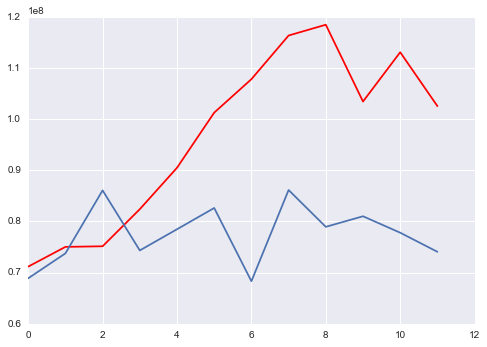

In [29]:
x = month[['year', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = month['sales']
xtrain = x[:-12]
ytrain = y[:-12]
xtest = x[-12:]
ytest = y[-12:]
#print( xtrain.shape, ytrain.shape)
reg = linear_model.LinearRegression()
reg.fit(xtrain,ytrain)
# The coefficients
#print('Coefficients:', reg.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
#      % np.mean((reg.predict(xtest) - ytest) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(xtest, ytest))
plt.plot(list(reg.predict(xtest)), color = 'r')
plt.plot(list(ytest))
plt.show()

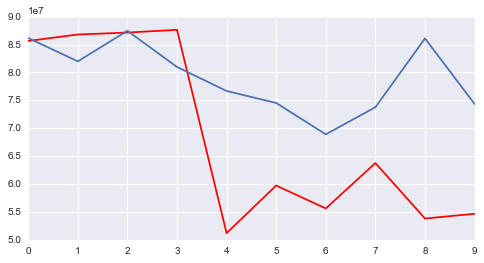

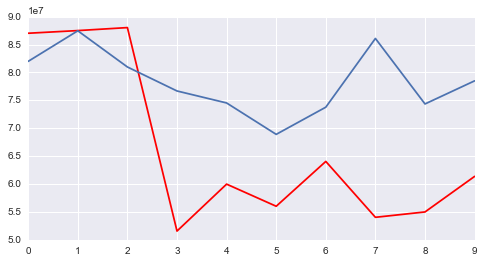

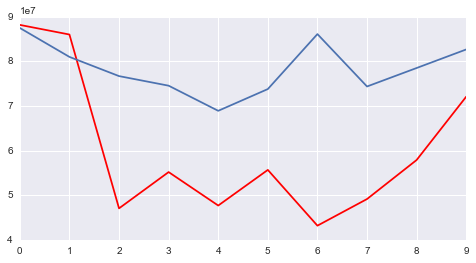

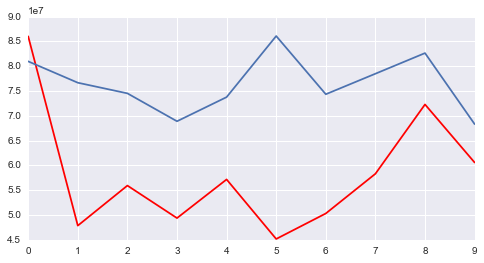

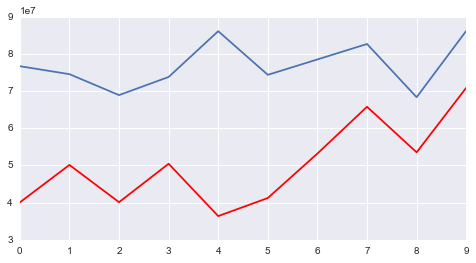

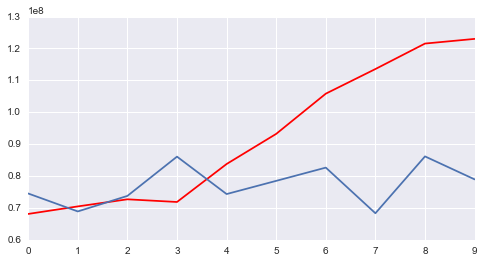

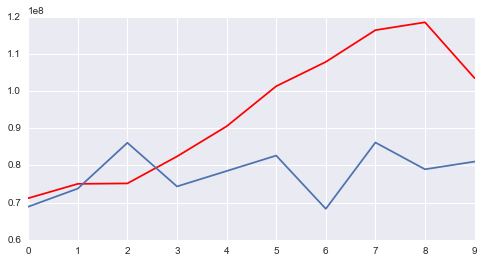

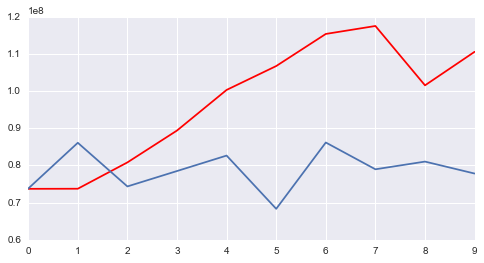

In [30]:
for i in range(18,26):
    machinelearning(x,y,i)

In [31]:
data

,BILL_RUN_DATE,year,month_nm,Division,sales,dayofweek,week,month,Date,Public,...,overall_unemployment_rate,labor_force,employment,unemployment,workforce_in_construction,unemployment_rate_in_construction,IPI,construction_value,CPI,temperature
0,2014-01-03,2014,Jan,C,2.527858e+06,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
1,2014-01-03,2014,Jan,S,8.450965e+04,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
2,2014-01-03,2014,Jan,G,1.027920e+03,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
3,2014-01-03,2014,Jan,F,2.113662e+03,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
4,2014-01-03,2014,Jan,K,3.411432e+05,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
5,2014-01-03,2014,Jan,B,8.391750e+03,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
6,2014-01-03,2014,Jan,P,3.837473e+04,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
7,2014-01-03,2014,Jan,A,2.074950e+03,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
8,2014-01-03,2014,Jan,Q,4.920000e+02,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9
9,2014-01-03,2014,Jan,AA,0.000000e+00,4,1,1,2014-01-01,260580,...,6.6,155295,145055,10240,5989,12.3,102.6063,954642,235.385,31.9


In [32]:
cluster1st = ['C','K','N','O','R']
cluster2nd = ['H','J','S','E']
cluster1 = data.loc[data['Division'].isin(cluster1st)]
cluster2 = data.loc[data['Division'].isin(cluster2nd)]
cluster3 = data.loc[~data['Division'].isin(cluster2nd+cluster1st)]

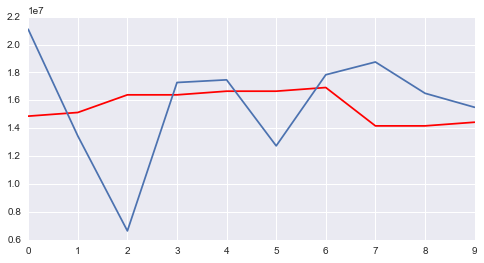

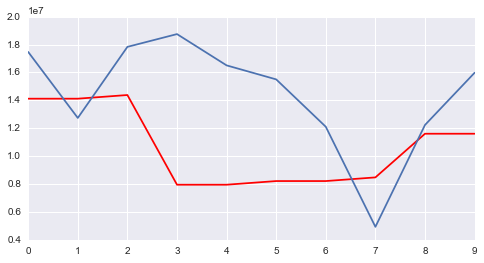

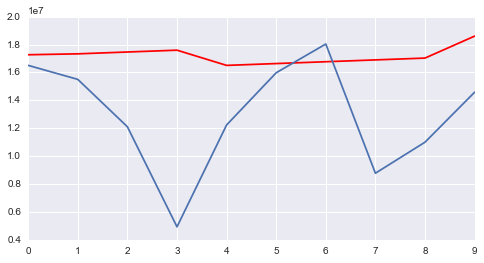

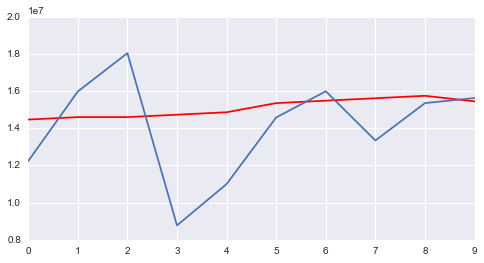

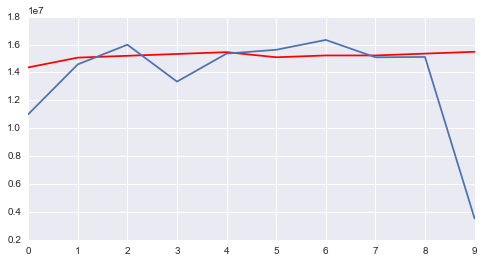

In [33]:
cluster1week = cluster1.groupby(['year','week','month'],as_index=False)['sales'].sum()
cluster1week = pd.merge(cluster1week, data2, on = ['month','year'], how = 'left')
cluster1week = pd.merge(cluster1week, data1, on = ['month','year'], how = 'left')
#week = data.groupby(['year','week'],as_index=False)['sales'].sum()
#del week['Date']
#del week['month str']
x = cluster1week[['year', 'week', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster1week['sales']
for i in range(100,120,4):
    machinelearning(x,y,i) 

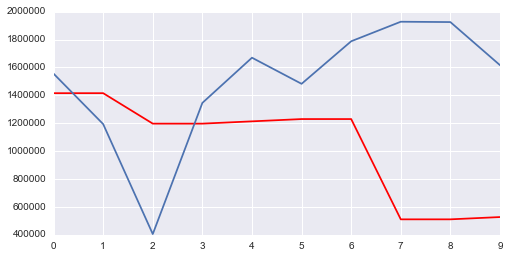

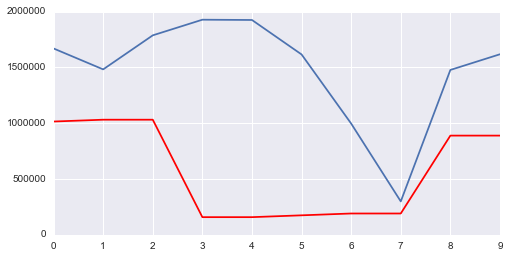

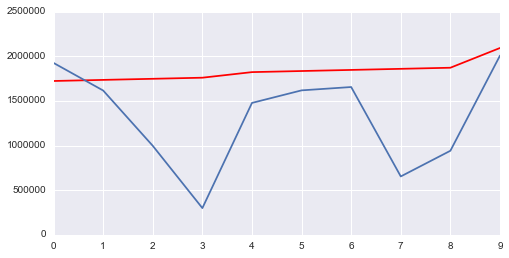

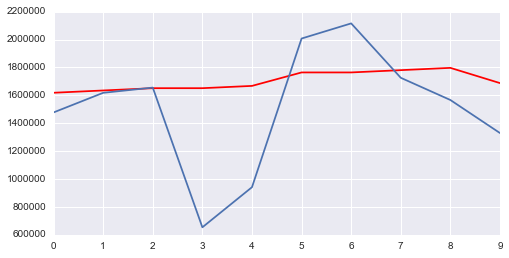

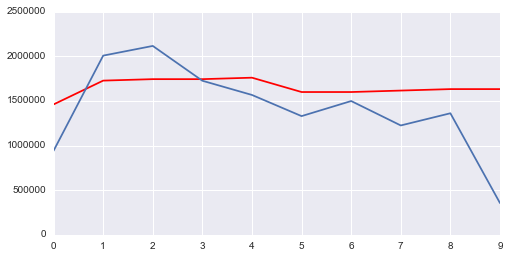

In [34]:
cluster2week = cluster2.groupby(['year','week','month'],as_index=False)['sales'].sum()
cluster2week = pd.merge(cluster2week, data2, on = ['month','year'], how = 'left')
cluster2week = pd.merge(cluster2week, data1, on = ['month','year'], how = 'left')
#week = data.groupby(['year','week'],as_index=False)['sales'].sum()
#del week['Date']
#del week['month str']
x = cluster2week[['year', 'week', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster2week['sales']
for i in range(100,120,4):
    machinelearning(x,y,i) 

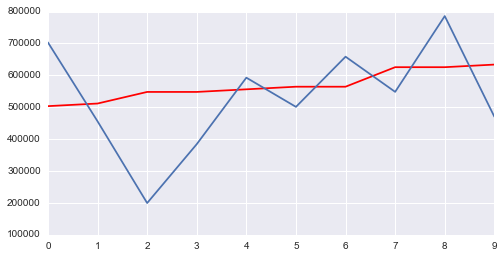

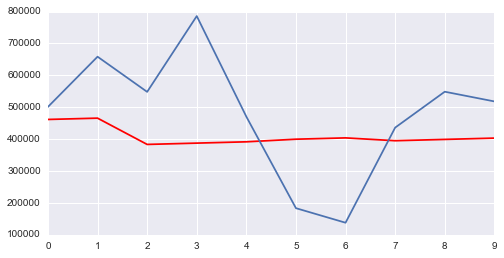

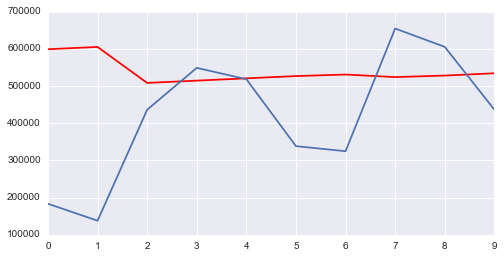

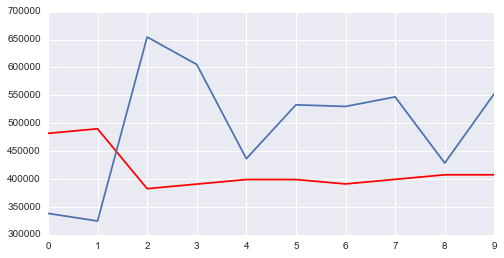

In [39]:
cluster3week = cluster3.groupby(['year','week','month'],as_index=False)['sales'].sum()
cluster3week = pd.merge(cluster3week, data2, on = ['month','year'], how = 'left')
cluster3week = pd.merge(cluster3week, data1, on = ['month','year'], how = 'left')
#week = data.groupby(['year','week'],as_index=False)['sales'].sum()
#del week['Date']
#del week['month str']
x = cluster3week[['year', 'week', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster3week['sales']
for i in range(100,120,5):
    machinelearning(x,y,i) 

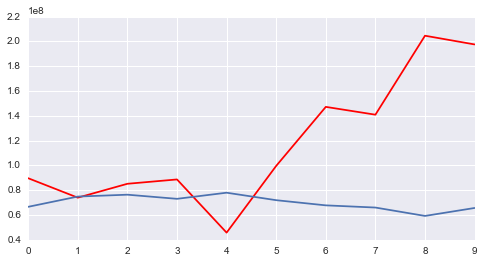

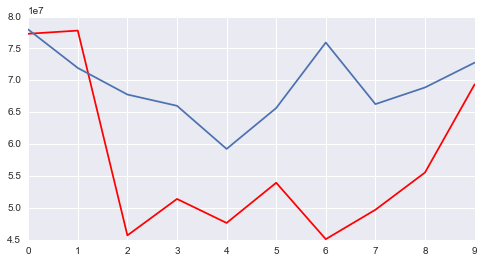

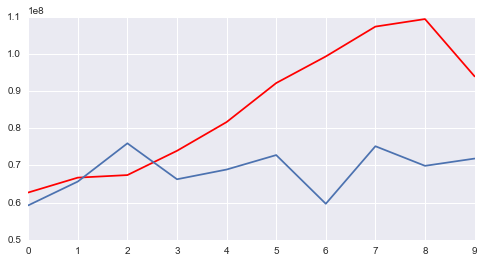

In [36]:
cluster1month = cluster1.groupby(['year', 'month'], as_index=False)['sales'].sum()

cluster1month = pd.merge(cluster1month, data2, on = ['month','year'], how = 'left')
cluster1month = pd.merge(cluster1month, data1, on = ['month','year'], how = 'left')
x = cluster1month[['year', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster1month['sales']
for i in range(16,26,4):
    machinelearning(x,y,i) 

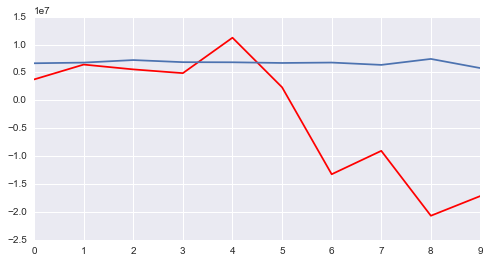

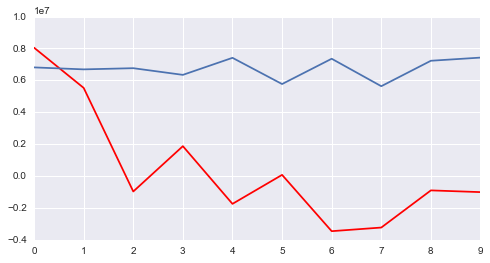

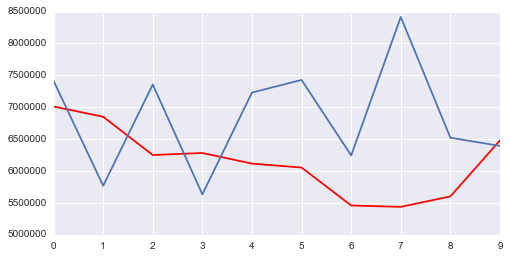

In [37]:
cluster2month = cluster2.groupby(['year', 'month'], as_index=False)['sales'].sum()

cluster2month = pd.merge(cluster2month, data2, on = ['month','year'], how = 'left')
cluster2month = pd.merge(cluster2month, data1, on = ['month','year'], how = 'left')
x = cluster2month[['year', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster2month['sales']
for i in range(16,26,4):
    machinelearning(x,y,i) 

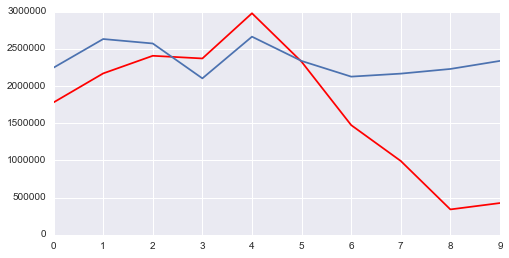

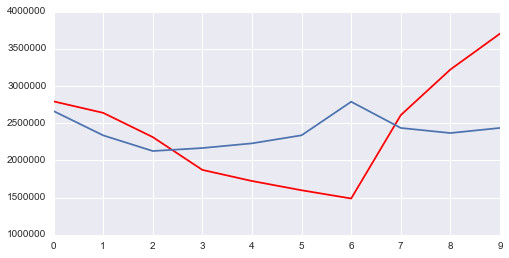

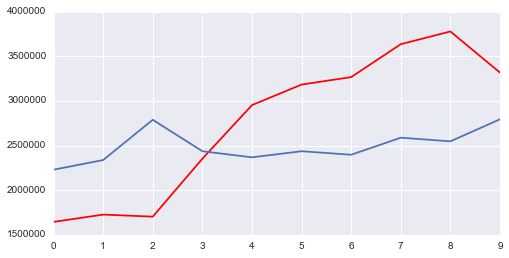

In [38]:
cluster3month = cluster3.groupby(['year', 'month'], as_index=False)['sales'].sum()

cluster3month = pd.merge(cluster3month, data2, on = ['month','year'], how = 'left')
cluster3month = pd.merge(cluster3month, data1, on = ['month','year'], how = 'left')
x = cluster3month[['year', 'month', 'Public', 'Private', 'Total',
       'overall_unemployment_rate', 'labor_force', 'employment',
       'unemployment', 'workforce_in_construction',
       'unemployment_rate_in_construction', 'IPI', 'construction_value', 'CPI',
       'temperature']]
y = cluster3month['sales']
for i in range(16,26,4):
    machinelearning(x,y,i) 